# EDA on Online Shopping

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# 1. Loading the Dataset
file_path = 'file.csv'
df = pd.read_csv('file.csv')

In [4]:
# 2. Displaying the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [5]:
# 3. Basic Information about the dataset
print("\nBasic Information:")
df.info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date            

In [6]:
# 4. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
          Unnamed: 0   CustomerID Gender Location  Tenure_Months  \
count   52955.000000  52924.00000  52924    52924   52924.000000   
unique           NaN          NaN      2        5            NaN   
top              NaN          NaN      F  Chicago            NaN   
freq             NaN          NaN  33007    18380            NaN   
mean    26477.000000  15346.70981    NaN      NaN      26.127995   
std     15286.936089   1766.55602    NaN      NaN      13.478285   
min         0.000000  12346.00000    NaN      NaN       2.000000   
25%     13238.500000  13869.00000    NaN      NaN      15.000000   
50%     26477.000000  15311.00000    NaN      NaN      27.000000   
75%     39715.500000  16996.25000    NaN      NaN      37.000000   
max     52954.000000  18283.00000    NaN      NaN      50.000000   

        Transaction_ID Transaction_Date     Product_SKU  \
count     52924.000000            52924           52924   
unique             NaN              365     

In [7]:
# 5. Checking for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


# Data Cleaning

In [8]:
# Dropping rows with missing values
df_cleaned = df.dropna()

In [9]:
print("\nData after cleaning:")
print(df_cleaned.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_SKU          52524 non-null  object 
 8   Product_Description  52524 non-null  object 
 9   Product_Category     52524 non-null  object 
 10  Quantity             52524 non-null  float64
 11  Avg_Price            52524 non-null  float64
 12  Delivery_Charges     52524 non-null  float64
 13  Coupon_Status        52524 non-null  object 
 14  GST                  52524 non-null  float64
 15  Date          

In [10]:
df.drop_duplicates(inplace=True)

# Univariate Analysis

In [11]:
# Assuming the dataset has a numerical column 'Column1' for demonstration

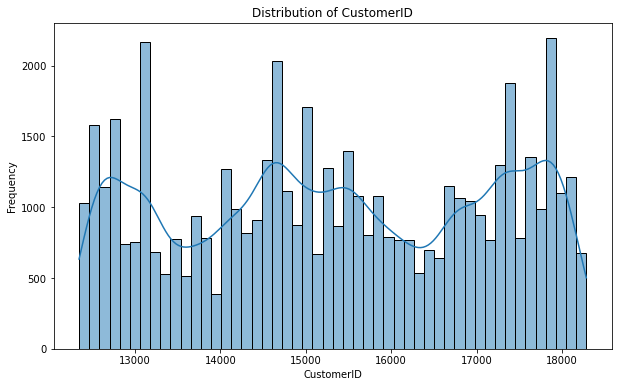

In [12]:
# Distribution of a numerical column (e.g., 'Column1')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CustomerID'], bins=50, kde=True)
plt.title('Distribution of CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

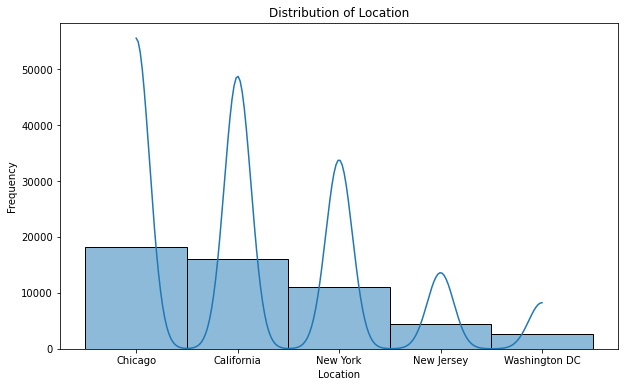

In [13]:
# Distribution of a numerical column (e.g., 'Column1')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Location'], bins=50, kde=True)
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

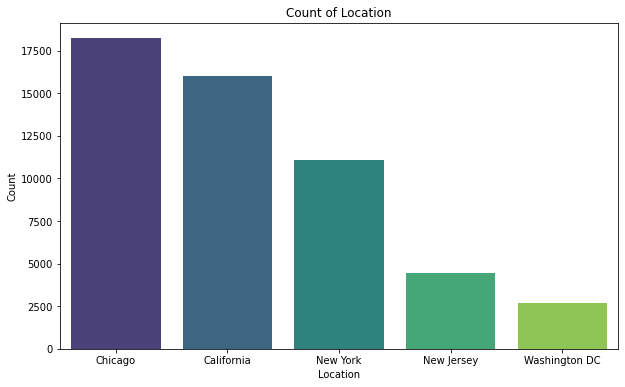

In [14]:
# 8. Visualizing Categorical Data
# Assuming the dataset has a categorical column 'Category' for demonstration
# Count plot of a categorical column (e.g., 'Category')
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df_cleaned, palette='viridis')
plt.title('Count of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

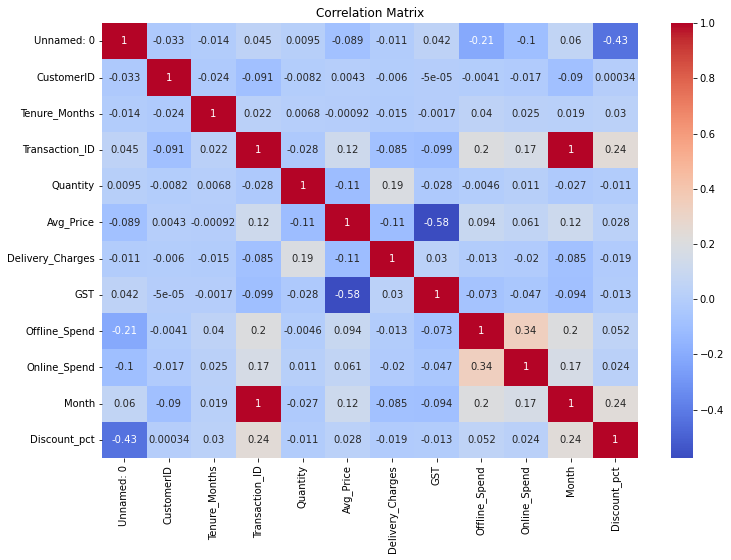

In [15]:
# 9. Correlation Matrix (if applicable)
# Select only numerical columns for correlation analysis
numerical_df = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
numerical_df.corr()


,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
Unnamed: 0,1.000000,-0.033126,-0.014160,0.044865,0.009459,-0.089054,-0.010770,0.042181,-0.210079,-0.101127,0.060389,-0.434369
CustomerID,-0.033126,1.000000,-0.023816,-0.091303,-0.008158,0.004321,-0.005956,-0.000050,-0.004118,-0.017440,-0.090152,0.000337
Tenure_Months,-0.014160,-0.023816,1.000000,0.021634,0.006807,-0.000916,-0.014535,-0.001652,0.040147,0.025451,0.018878,0.029703
Transaction_ID,0.044865,-0.091303,0.021634,1.000000,-0.028466,0.124854,-0.084902,-0.099080,0.200343,0.165640,0.995521,0.241759
Quantity,0.009459,-0.008158,0.006807,-0.028466,1.000000,-0.114066,0.191787,-0.028219,-0.004583,0.010647,-0.027297,-0.011381
Avg_Price,-0.089054,0.004321,-0.000916,0.124854,-0.114066,1.000000,-0.108026,-0.575806,0.094083,0.060772,0.118675,0.027688
Delivery_Charges,-0.010770,-0.005956,-0.014535,-0.084902,0.191787,-0.108026,1.000000,0.029983,-0.013219,-0.019590,-0.085363,-0.018870
GST,0.042181,-0.000050,-0.001652,-0.099080,-0.028219,-0.575806,0.029983,1.000000,-0.073077,-0.046616,-0.094246,-0.012852
Offline_Spend,-0.210079,-0.004118,0.040147,0.200343,-0.004583,0.094083,-0.013219,-0.073077,1.000000,0.336336,0.201543,0.051719
Online_Spend,-0.101127,-0.017440,0.025451,0.165640,0.010647,0.060772,-0.019590,-0.046616,0.336336,1.000000,0.165820,0.024343


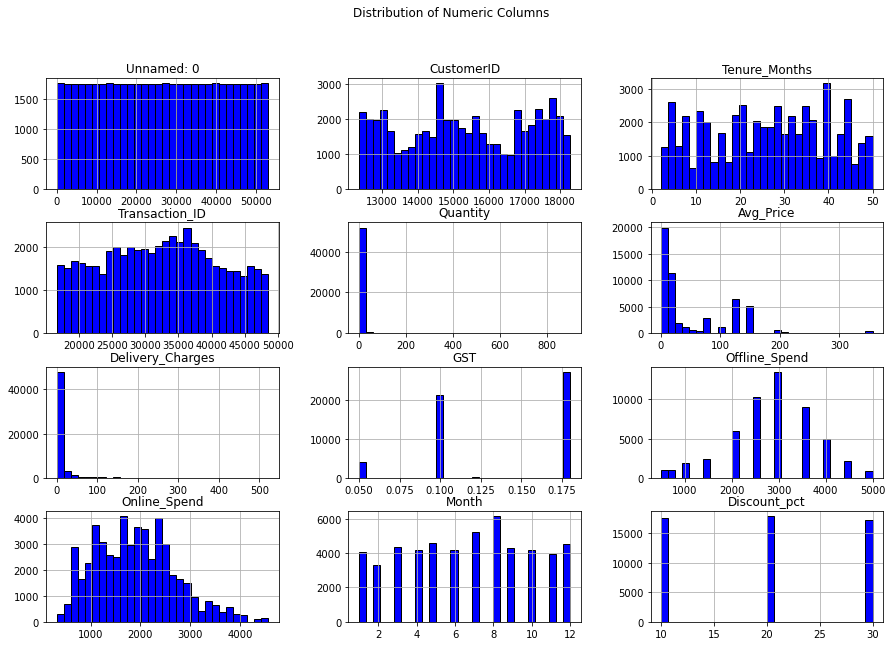

In [18]:
# Histograms of numeric columns
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numeric Columns')
plt.show()

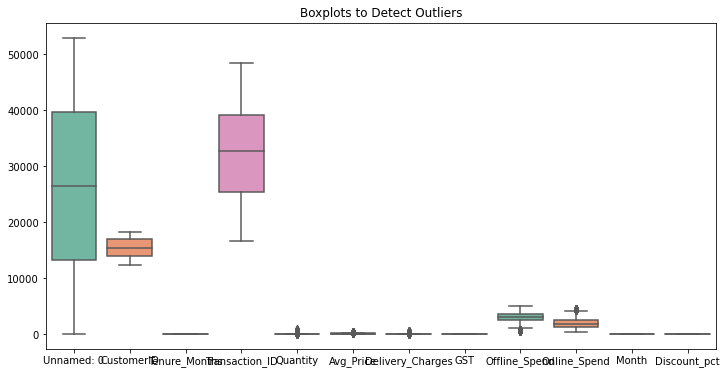

In [19]:
# Boxplot for each numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.title('Boxplots to Detect Outliers')
plt.show()

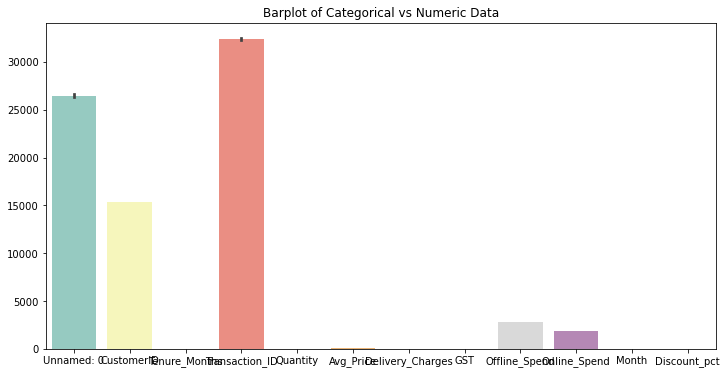

In [20]:
# Barplot example: Categorical vs Numeric
plt.figure(figsize=(12, 6))
sns.barplot( data=df, palette='Set3')
plt.title('Barplot of Categorical vs Numeric Data')
plt.show()

In [21]:
# Standard Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Scikit-learn Libraries for EDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Correlation and Statistical Libraries
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Simulating a dataset
np.random.seed(42)
n_customers = 500

df = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Age': np.random.randint(18, 65, n_customers),
    'SessionDuration': np.random.normal(30, 10, n_customers).round(1),
    'PageViews': np.random.poisson(5, n_customers),
    'ItemsAddedToCart': np.random.poisson(3, n_customers),
    'PurchaseMade': np.random.choice([0, 1], n_customers, p=[0.7, 0.3]),
    'TotalSpent': np.random.normal(50, 20, n_customers).round(2),
    'DayOfWeek': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], n_customers)
})

# Set negative total spend to 0 if no purchase made
df['TotalSpent'] = np.where(df['PurchaseMade'] == 0, 0, df['TotalSpent'])

# Preview the dataset
df.head()


,CustomerID,Gender,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,DayOfWeek
0,1,Male,38,8.5,8,1,0,0.00,Saturday
1,2,Female,49,35.1,6,2,0,0.00,Monday
2,3,Male,40,17.8,2,2,0,0.00,Wednesday
3,4,Male,50,18.4,6,1,0,0.00,Thursday
4,5,Male,20,29.6,7,3,1,30.19,Friday


## Data Processing

In [23]:
# Check for missing values
print(df.isnull().sum())

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'SessionDuration', 'PageViews', 'ItemsAddedToCart', 'TotalSpent']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender', 'DayOfWeek'], drop_first=True)

# Verifying the processed dataset
df.head()

CustomerID          0
Gender              0
Age                 0
SessionDuration     0
PageViews           0
ItemsAddedToCart    0
PurchaseMade        0
TotalSpent          0
DayOfWeek           0
dtype: int64


,CustomerID,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,Gender_Male,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,1,-0.205739,-2.092821,1.288307,-1.092433,0,-0.576842,1,0,1,0,0,0,0
1,2,0.623245,0.391872,0.424251,-0.496777,0,-0.576842,0,1,0,0,0,0,0
2,3,-0.055014,-1.224113,-1.303860,-0.496777,0,-0.576842,1,0,0,0,0,0,1
3,4,0.698607,-1.168067,0.424251,-1.092433,0,-0.576842,1,0,0,0,1,0,0
4,5,-1.562258,-0.121881,0.856279,0.098879,1,0.616463,1,0,0,0,0,0,0


## Multicollinearity check

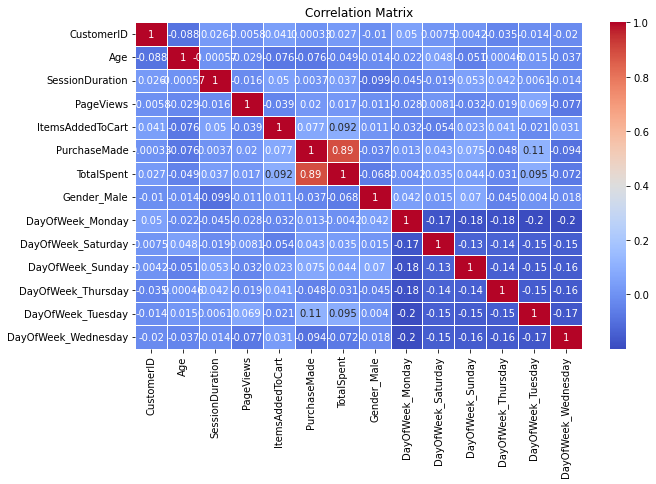

High Correlations (> 0.8):
 TotalSpent    PurchaseMade    0.889605
PurchaseMade  TotalSpent      0.889605
dtype: float64


In [24]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identifying high multicollinearity
high_corr = corr_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr > 0.8) & (high_corr < 1)]
print("High Correlations (> 0.8):\n", high_corr)

## Feature Engineering

In [25]:
# Creating new features
df['PurchaseEfficiency'] = df['TotalSpent'] / (df['ItemsAddedToCart'] + 1)
df['PageViewEfficiency'] = df['PageViews'] / (df['SessionDuration'] + 1)

# Handling infinite values in efficiency
df.replace([np.inf, -np.inf], 0, inplace=True)

# Preview
df[['PurchaseEfficiency', 'PageViewEfficiency']].head()

,PurchaseEfficiency,PageViewEfficiency
0,6.240679,-1.178882
1,-1.146294,0.304806
2,-1.146294,5.817873
3,6.240679,-2.524297
4,0.560993,0.975129


## Multivariate Analysis Techniques

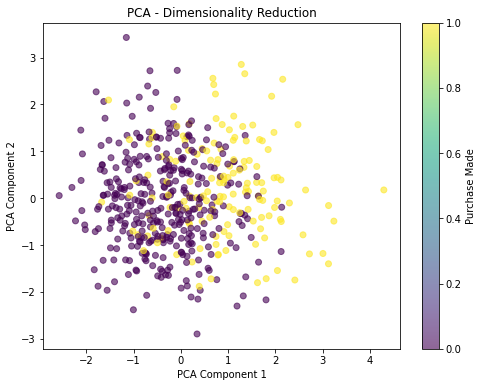

Explained Variance by PCA Components: [0.23276779 0.20741527]


In [26]:
# PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numerical_features])

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['PurchaseMade'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - Dimensionality Reduction')
plt.colorbar(label='Purchase Made')
plt.show()

# Explained variance ratio
print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)

## t-SNE Visualisation

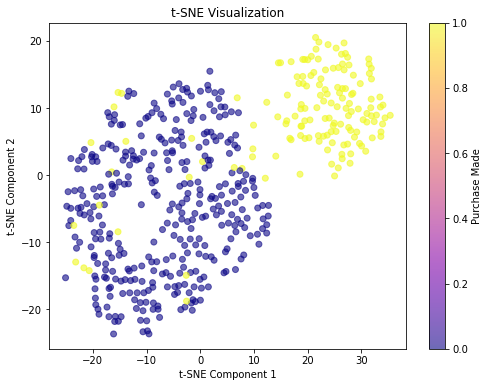

In [27]:
# t-SNE for high-dimensional visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df[numerical_features])

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['PurchaseMade'], cmap='plasma', alpha=0.6)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Purchase Made')
plt.show()

## Clustering

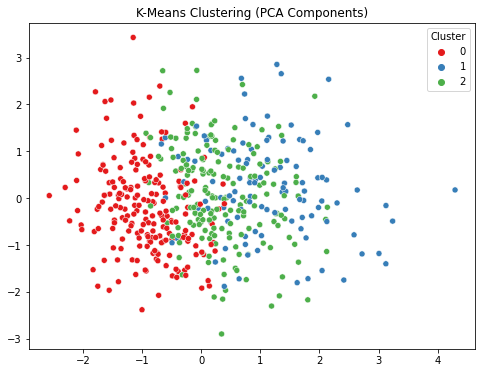

Silhouette Score: 0.18278432396879163


In [28]:
# Using K-Means clustering to identify customer segments
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[numerical_features])

# Adding cluster information to the dataset
df['Cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering (PCA Components)')
plt.show()

# Silhouette Score to evaluate clustering
sil_score = silhouette_score(df[numerical_features], df['Cluster'])
print(f'Silhouette Score: {sil_score}')

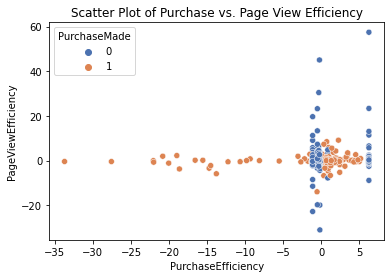

In [29]:
sns.scatterplot(data=df, x='PurchaseEfficiency', y='PageViewEfficiency', hue='PurchaseMade', palette='deep')
plt.title('Scatter Plot of Purchase vs. Page View Efficiency')
plt.show()

Problem Statement: The objective of this analysis is to understand the factors influencing customer behavior and satisfaction in online shopping. By examining key metrics such as demographics, product preferences, purchasing patterns, and customer reviews, we aim to uncover insights that will help improve the online shopping experience, increase customer retention, and optimize marketing strategies.

In [30]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
display(df.describe(include='all'))


Descriptive Statistics:


,CustomerID,Age,SessionDuration,PageViews,ItemsAddedToCart,PurchaseMade,TotalSpent,Gender_Male,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PurchaseEfficiency,PageViewEfficiency,Cluster
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.0000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,2.660094e-16,1.767475e-16,5.750955e-17,-6.217249e-17,0.296000,1.172396e-16,0.488000,0.188000,0.11400,0.124000,0.126000,0.1420,0.14600,0.247354,0.403362,0.972000
std,144.481833,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,0.456948,1.001002e+00,0.500357,0.391103,0.31813,0.329912,0.332182,0.3494,0.35346,4.326366,5.049408,0.881345
min,1.000000,-1.712983e+00,-2.681301e+00,-2.167916e+00,-1.688088e+00,0.000000,-8.894964e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-33.729465,-31.034007,0.000000
25%,125.750000,-8.839985e-01,-6.776673e-01,-8.718323e-01,-4.967768e-01,0.000000,-5.768418e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-0.524937,-0.629249,0.000000
50%,250.500000,2.034779e-02,-2.847122e-02,-7.776502e-03,9.887884e-02,0.000000,-5.768418e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,-0.251875,-0.005107,1.000000
75%,375.250000,8.493319e-01,6.650943e-01,8.562793e-01,6.945345e-01,1.000000,4.850376e-01,1.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,1.189042,0.765325,2.000000
max,500.000000,1.753678e+00,2.876564e+00,4.312502e+00,3.672813e+00,1.000000,3.459209e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.00000,6.240679,57.497917,2.000000


In [31]:
# Step 1: Handling Missing Values
df_cleaned = df.copy()
df_cleaned.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')  # Drop irrelevant index column
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)  # Fill missing numeric values with medians
df_cleaned.fillna("Unknown", inplace=True)  # Fill missing categorical values with "Unknown"

## Vizualization Techniques

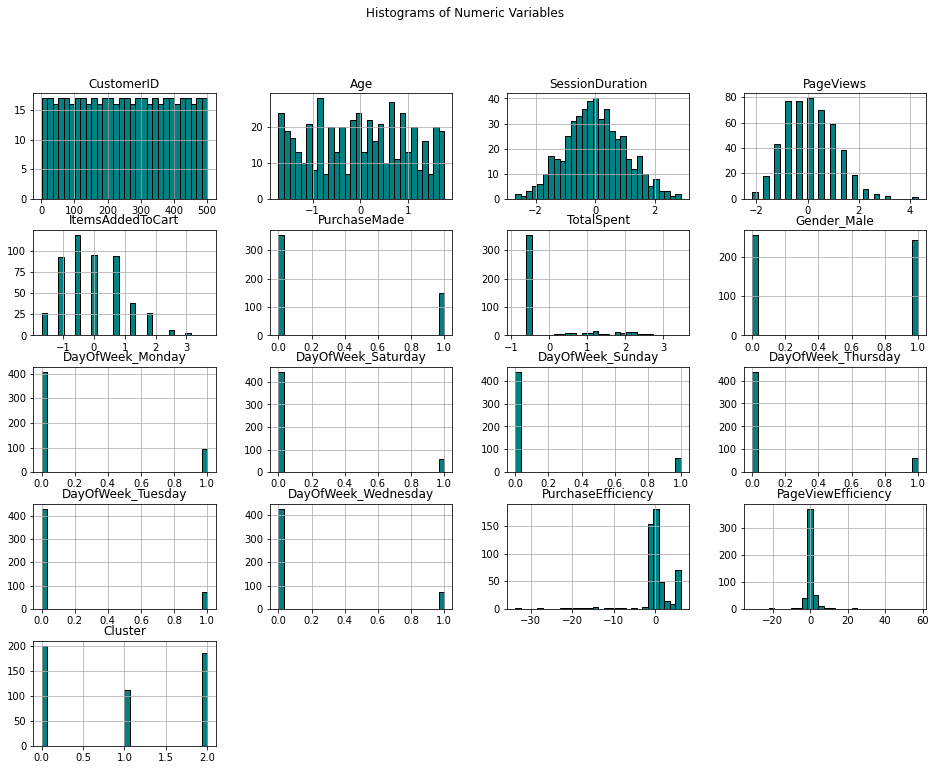

In [32]:
# Histograms
df_cleaned.hist(figsize=(16, 12), bins=30, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numeric Variables")
plt.show()

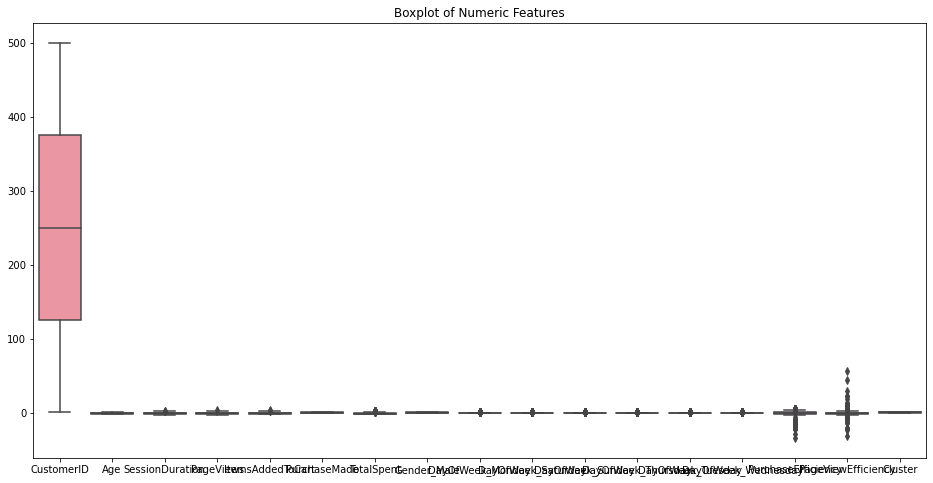

In [35]:
# Box Plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned.select_dtypes(include=np.number))
plt.title("Boxplot of Numeric Features")
plt.show()

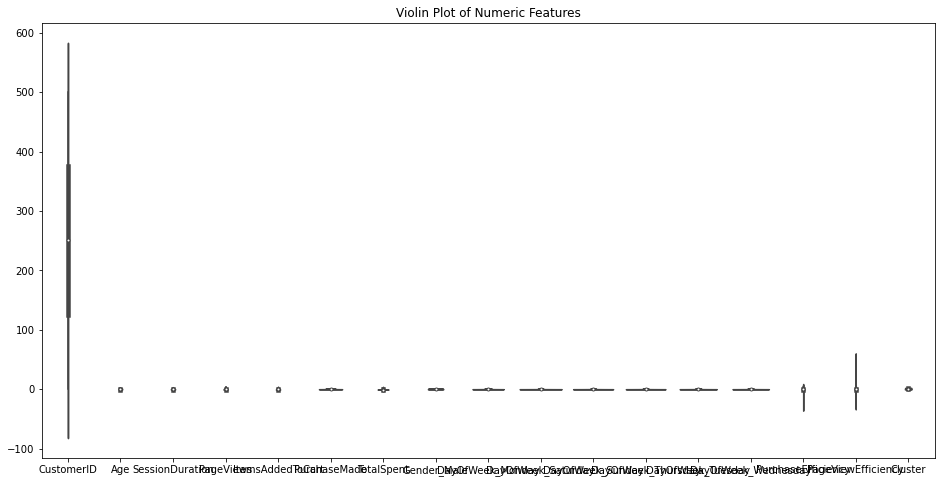

In [38]:
# Violin Plots
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_cleaned.select_dtypes(include=np.number))
plt.title("Violin Plot of Numeric Features")
plt.show()



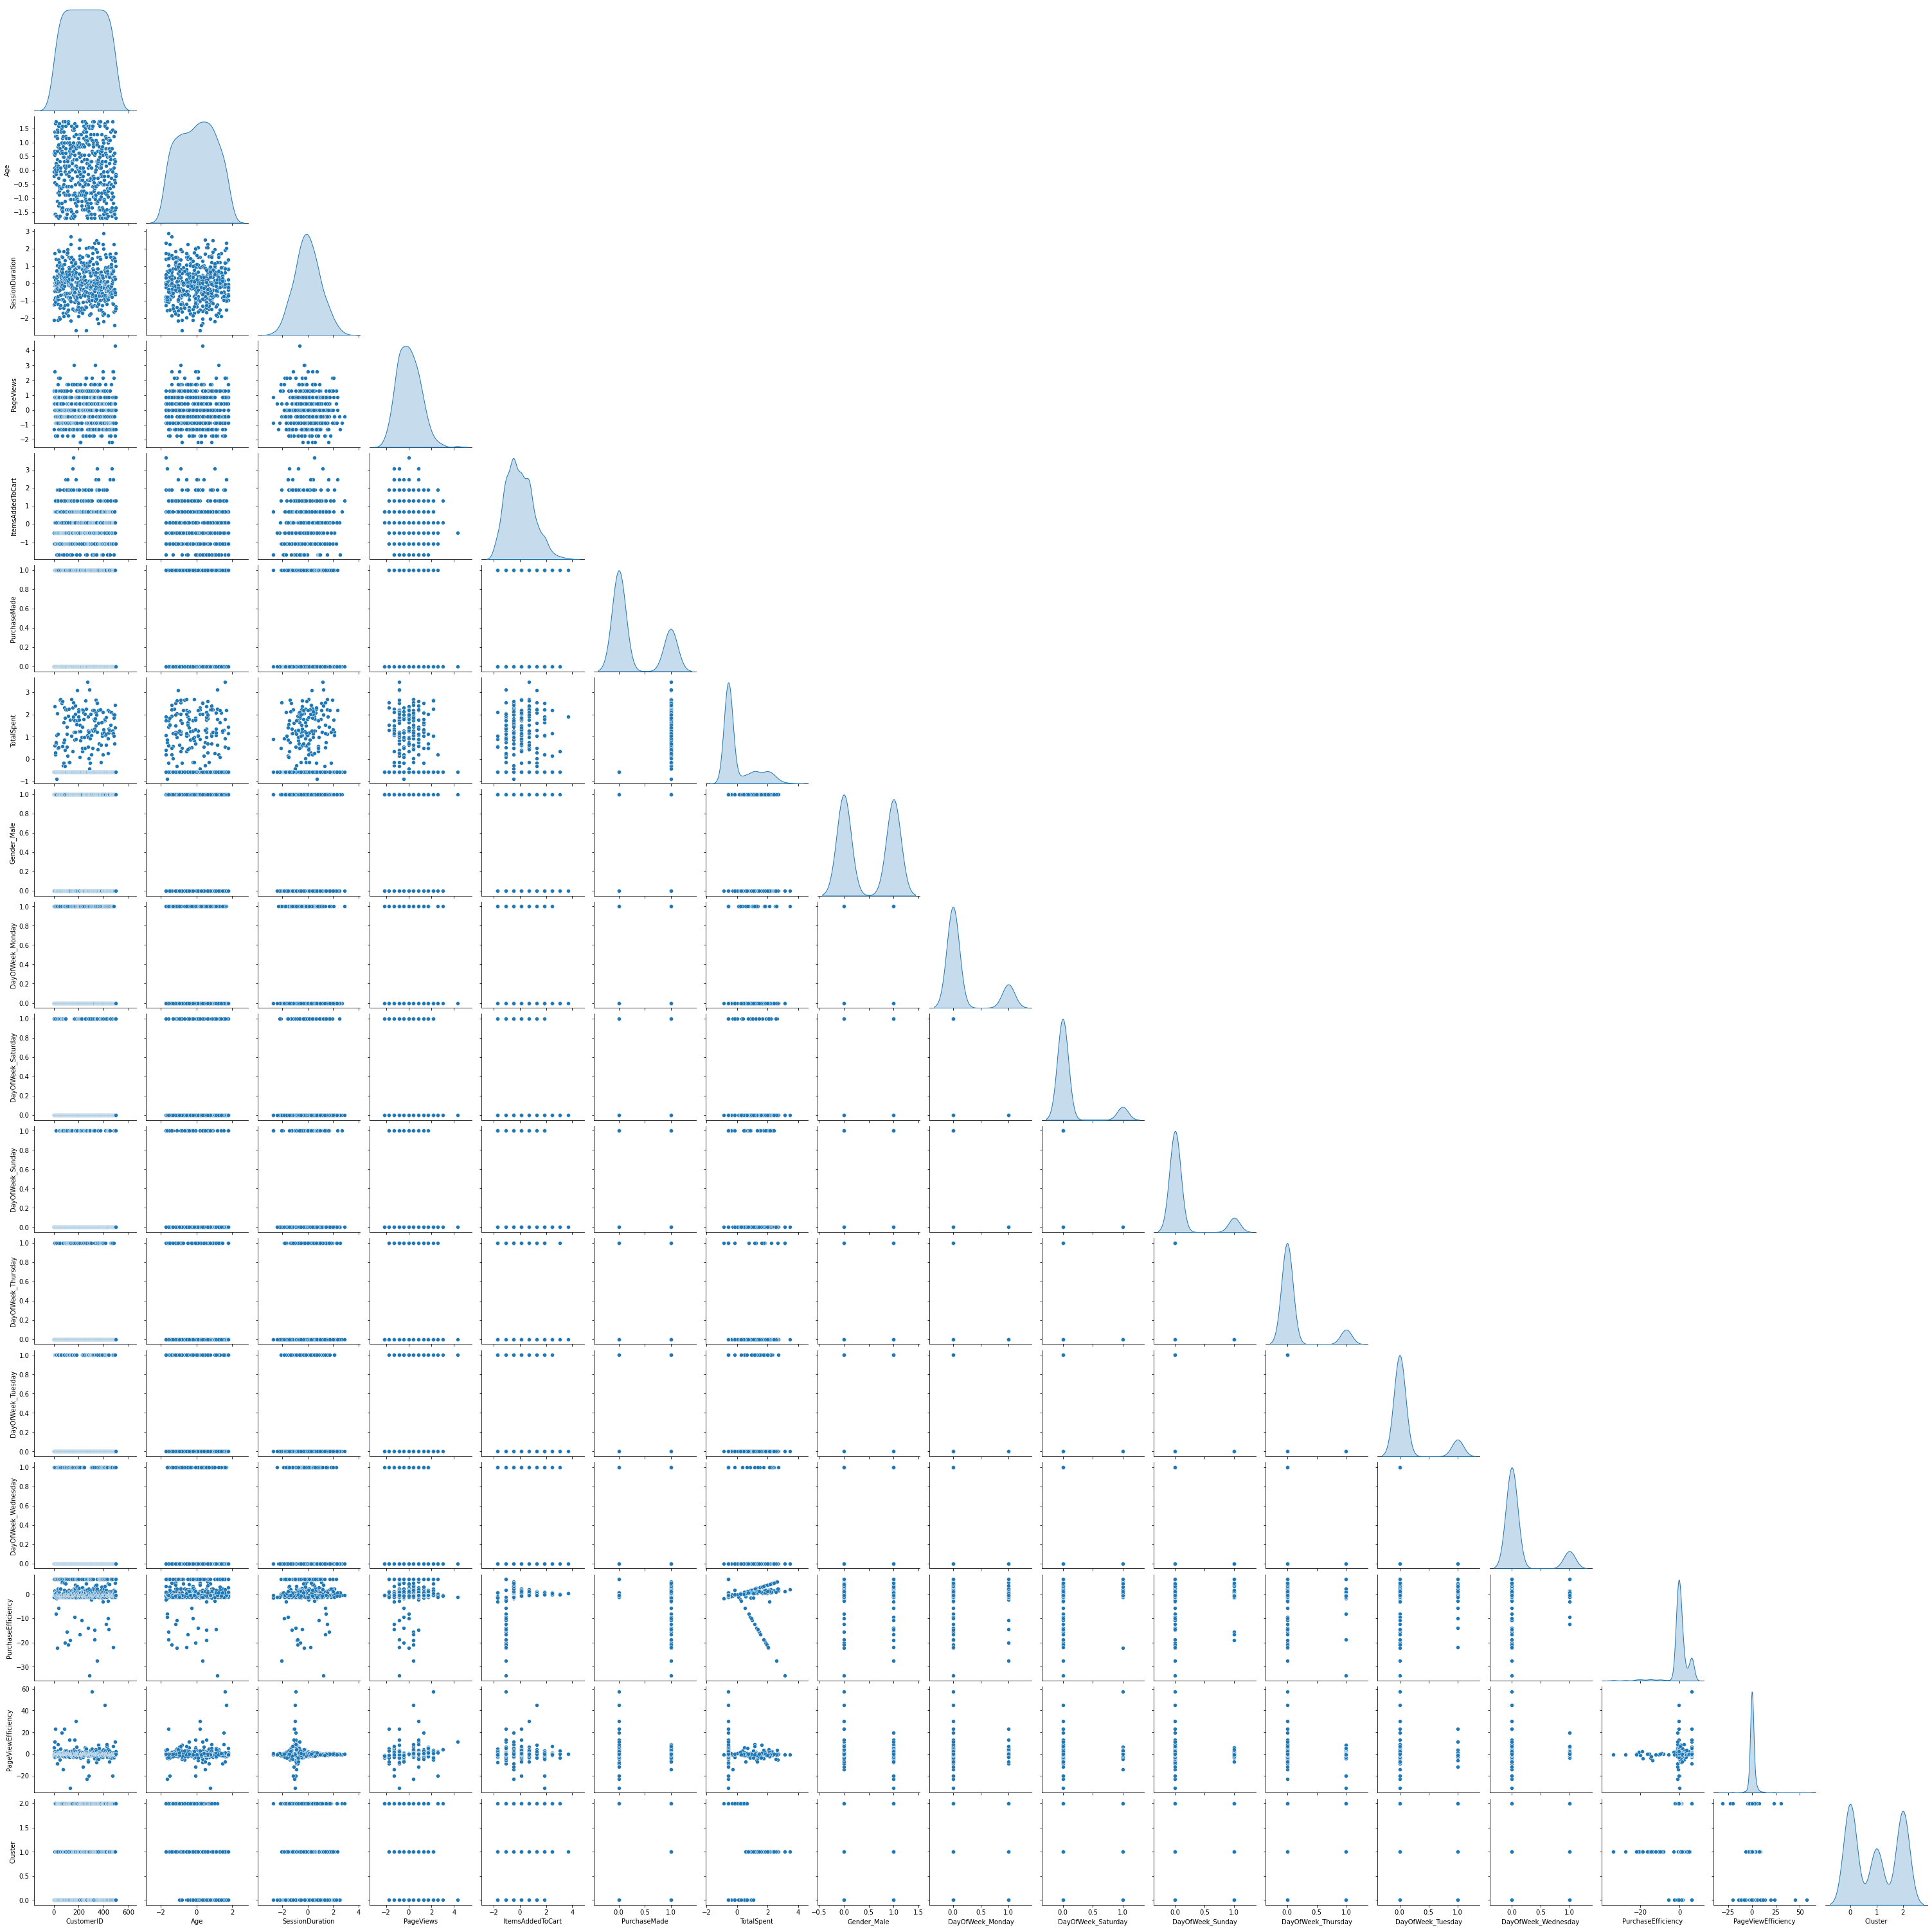

In [40]:
# Scatter Plots
sns.pairplot(df_cleaned.select_dtypes(include=np.number), diag_kind="kde", corner=True)
plt.show()

In [41]:
# Step 4: Data Transformation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.select_dtypes(include=np.number))
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.select_dtypes(include=np.number).columns)


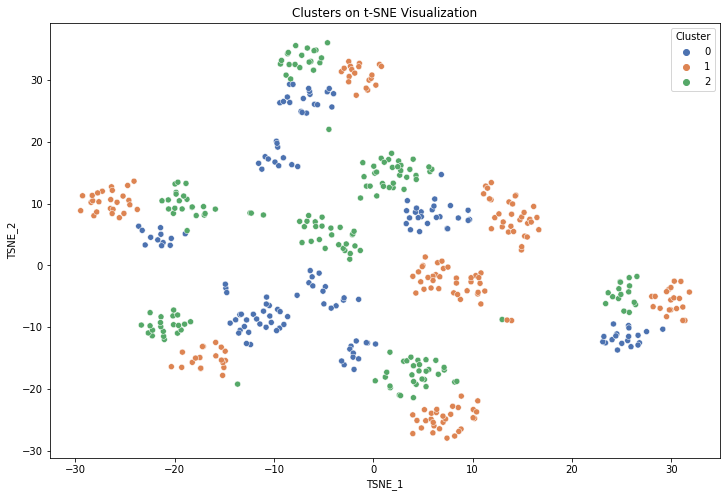

In [43]:
# Step 6: Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Cluster', data=df_cleaned, palette='deep')
plt.title("Clusters on t-SNE Visualization")
plt.show()